<a href="https://colab.research.google.com/github/SamyFanambinantsoa/Machine_Learning_M2/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chargement du notebook *Regression - California Housing* et Nettoyave/Prétraitement

In [116]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split

# Chargement des données  et modification des valeurs nulles
ds = fetch_california_housing()
dataset = pd.DataFrame(ds.data, columns=ds.feature_names)
dataset["MedHouseVal"] = ds.target
for col in dataset.columns:
    if dataset[col].dtype in [int, float]:
        mean_val = dataset[col][dataset[col] != 0].mean()
        dataset[col] = dataset[col].replace(0, mean_val)
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Statistiques descriptives (Moyenne, Ecart type, Max et Min) avec l'histogramme


,Moyenne,Écart-type,Minimum,Maximum
Revenu médian,3.87,1.90,0.50,15.00
Age moyen,28.64,12.59,1.00,52.00
Nombre de pièces,5.43,2.47,0.85,141.91
Nombre de chambres,1.10,0.47,0.33,34.07
Nombre moyen de personne,1425.48,1132.46,3.00,35682.00
Nombre moyen par logement,3.07,10.39,0.69,1243.33
Latitude,35.63,2.14,32.54,41.95
Longitude,-119.57,2.00,-124.35,-114.31
Prix moyen par logement,2.07,1.15,0.15,5.00


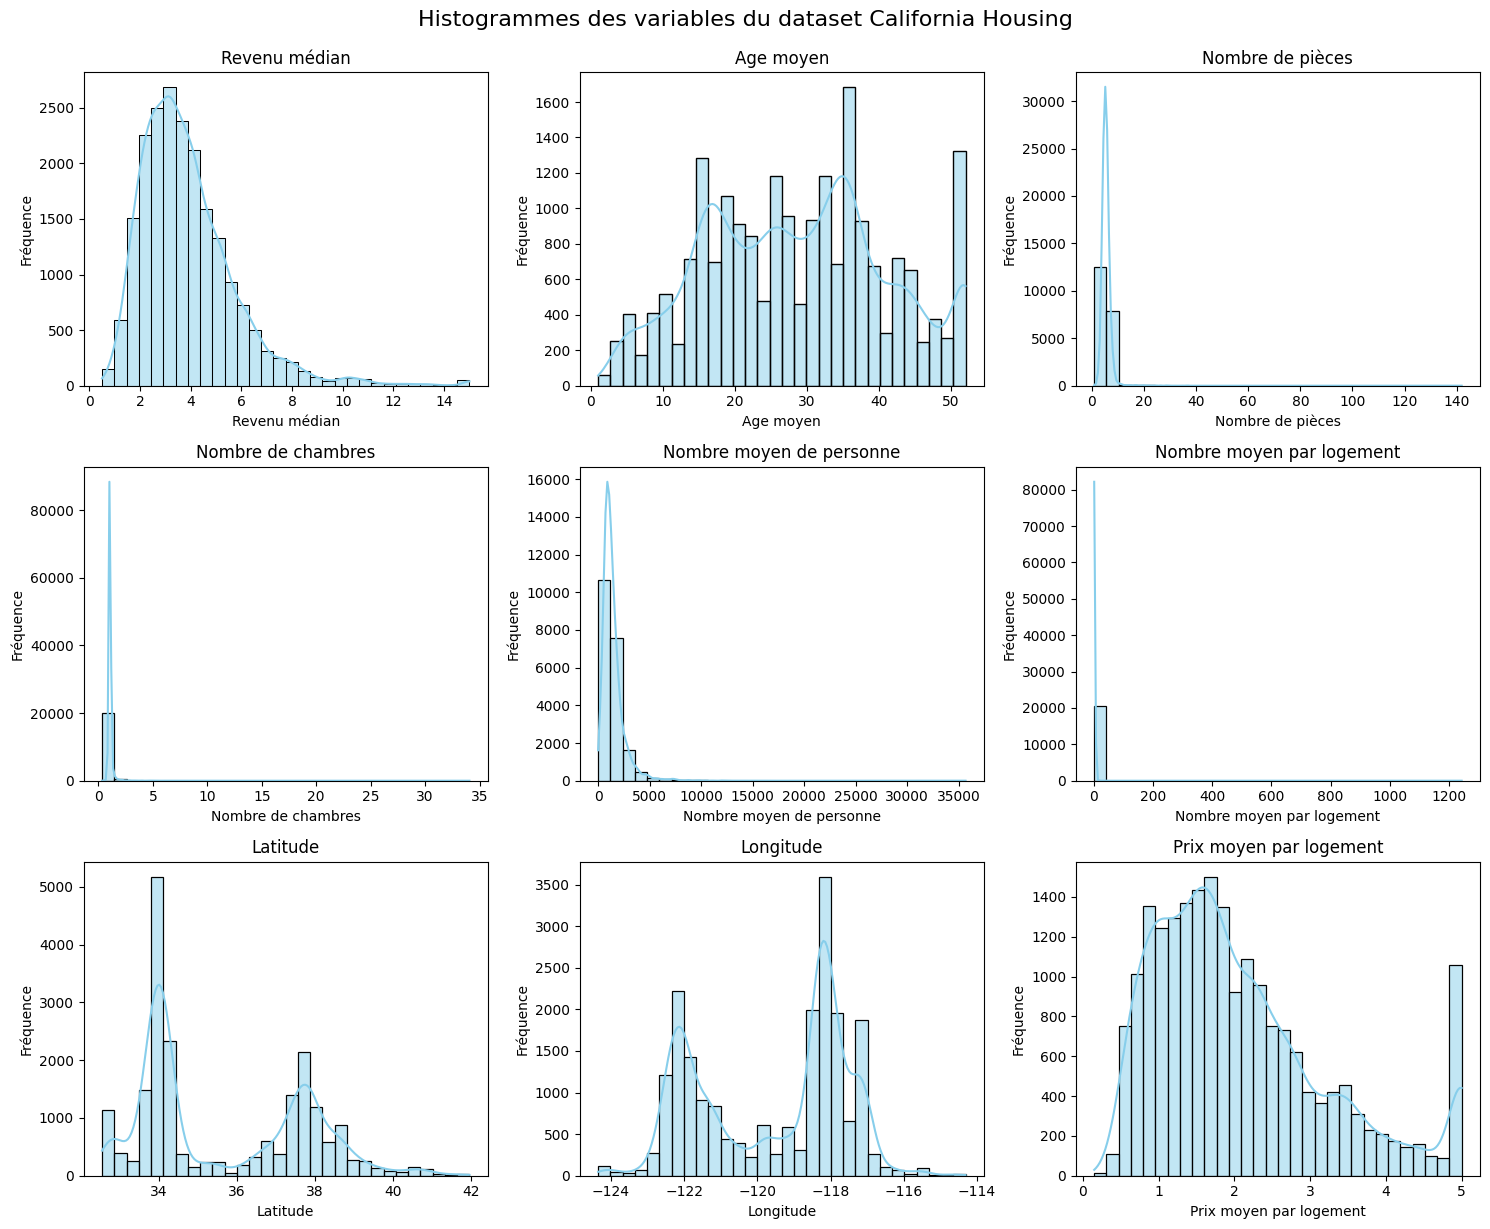

In [117]:

# Statistiques descriptives (Moyenne, ecart type, Max et Min) et histogrammes
# On renomme les tables pour une meilleure lisibilité
dataset = dataset.rename(columns={
    "MedInc": "Revenu médian",
    "HouseAge": "Age moyen",
    "AveRooms": "Nombre de pièces",
    "AveBedrms": "Nombre de chambres",
    "Population": "Nombre moyen de personne",
    "AveOccup": "Nombre moyen par logement",
    "MedHouseVal": "Prix moyen par logement",
})
# Affichage des statistiques
stats = pd.DataFrame({
    "Moyenne": dataset.mean(),
    "Écart-type": dataset.std(),
    "Minimum": dataset.min(),
    "Maximum": dataset.max()
})
display(stats.style.set_caption("Statistiques descriptives")
               .format(precision=2)
               .set_table_styles(
                   [{'selector': 'th', 'props': [('border', '1px solid black')]},
                    {'selector': 'td', 'props': [('border', '1px solid gray')]}]
               )
)
# Affichage de l'histogramme
plt.figure(figsize=(15, 12))
for i, column in enumerate(dataset.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(dataset[column], bins=30, kde=True, color='skyblue')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel("Fréquence")
    plt.tight_layout()

plt.suptitle("Histogrammes des variables du dataset California Housing", fontsize=16, y=1.02)
plt.show()

# Affichage du scatter-plots prix vs variables clés


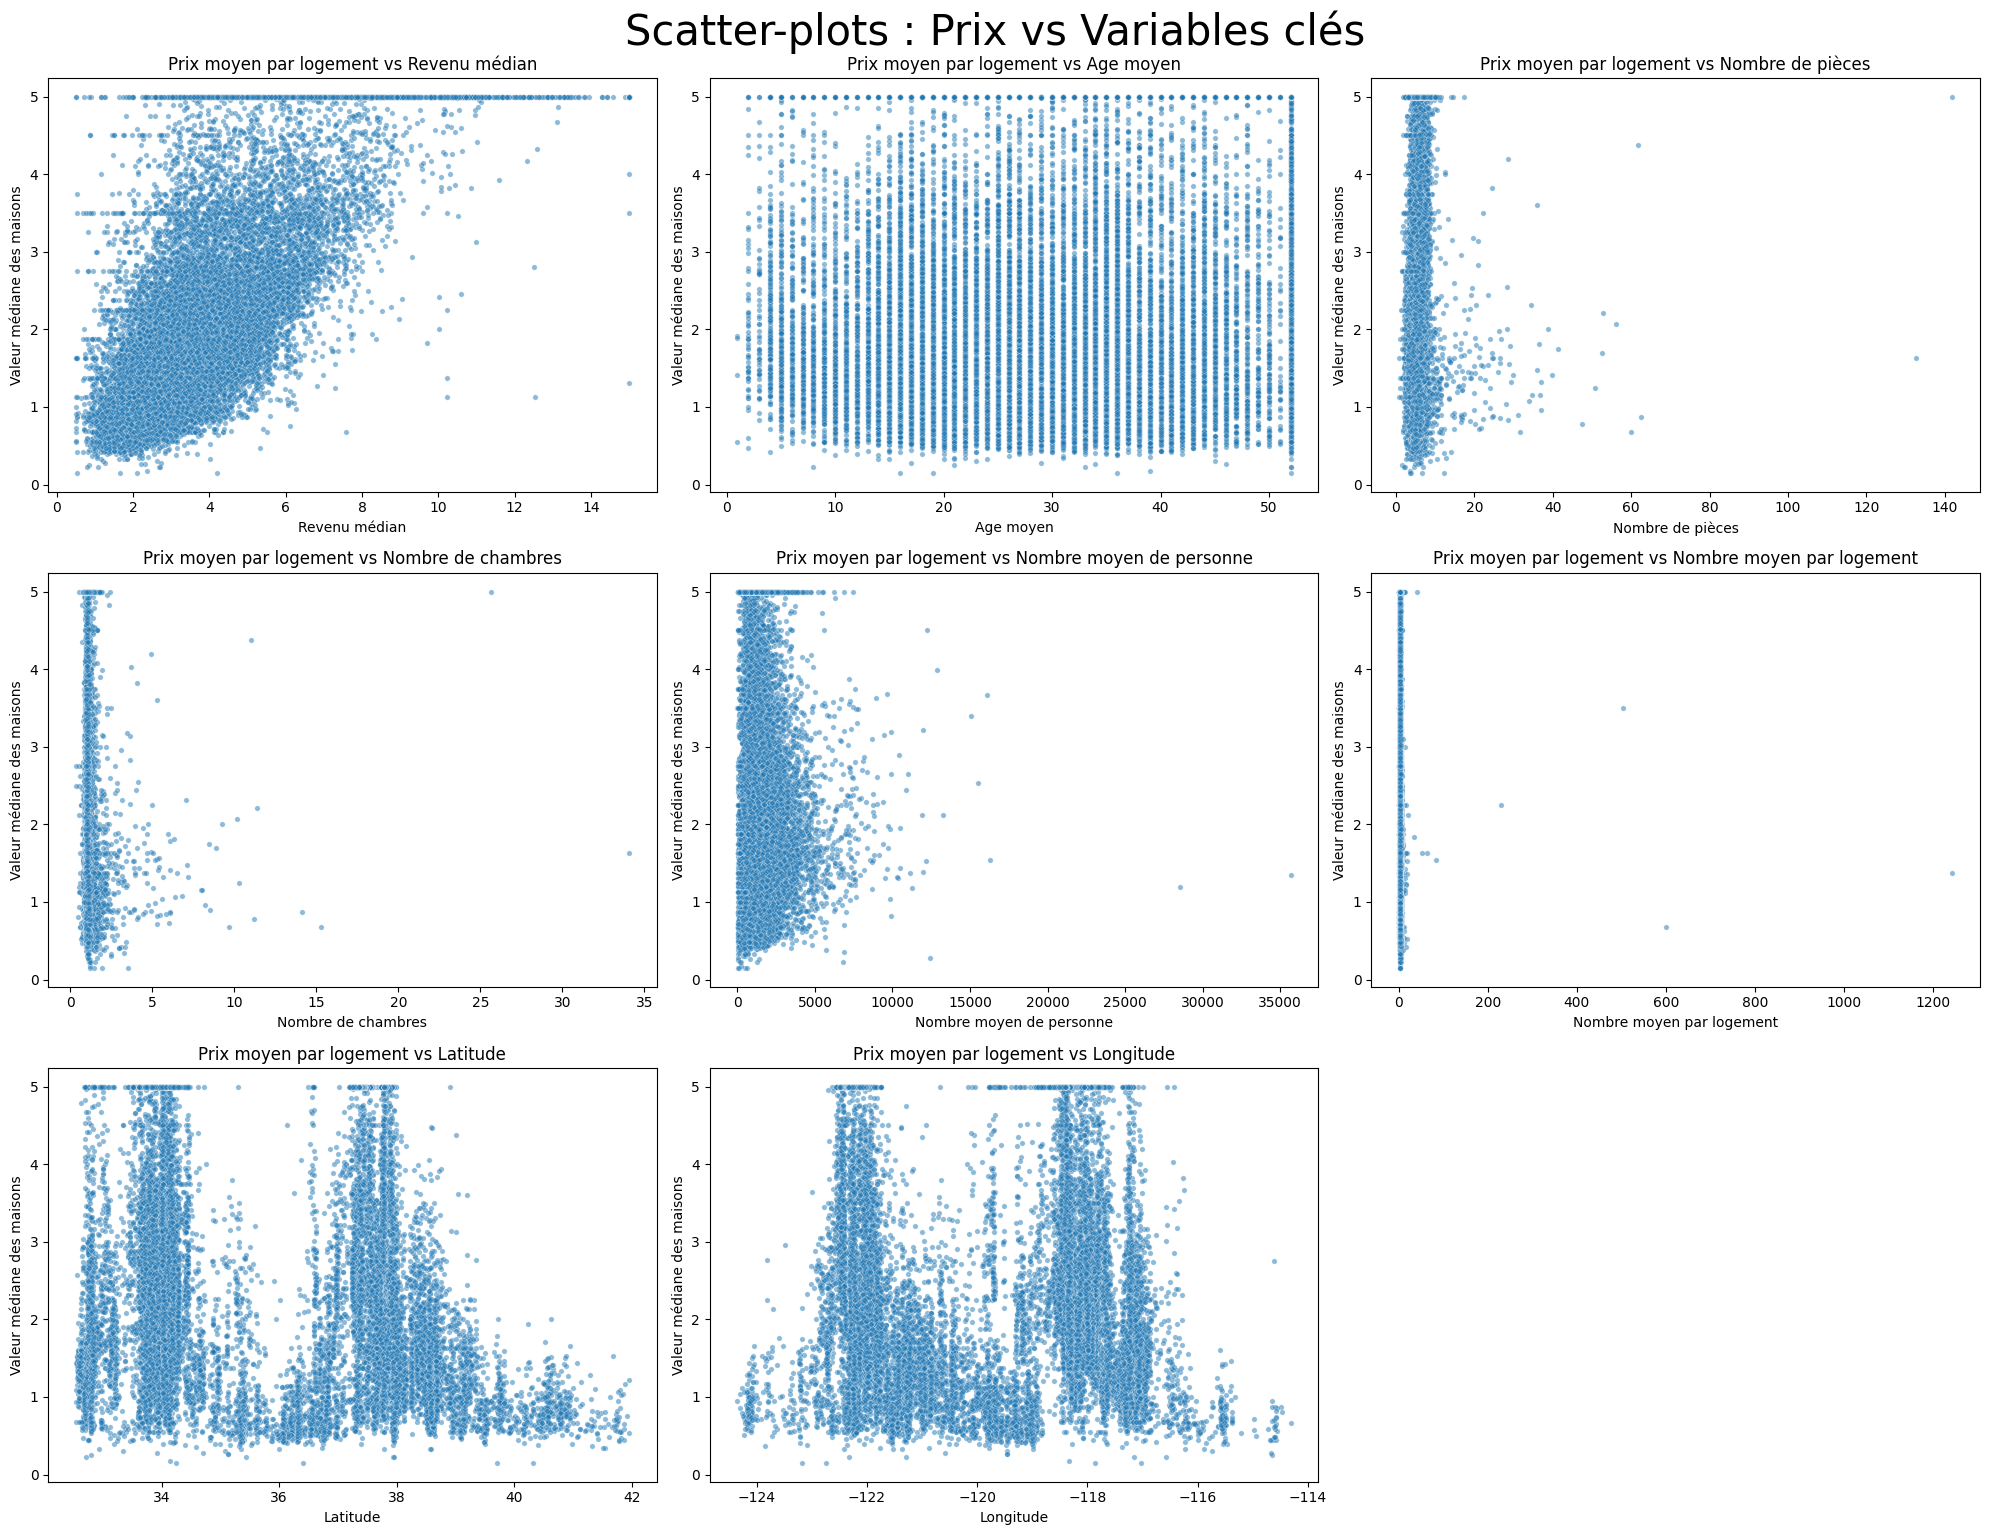

In [118]:
target = 'Prix moyen par logement'
features = dataset.columns.drop(target)

plt.figure(figsize=(20, 15))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=dataset, x=feature, y=target, alpha=0.5, s=15)
    plt.title(f"{target} vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Valeur médiane des maisons")
    plt.tight_layout()

plt.suptitle("Scatter-plots : Prix vs Variables clés", fontsize=30, y=1.02)
plt.show()



# Affichage de la matrice de corrélation

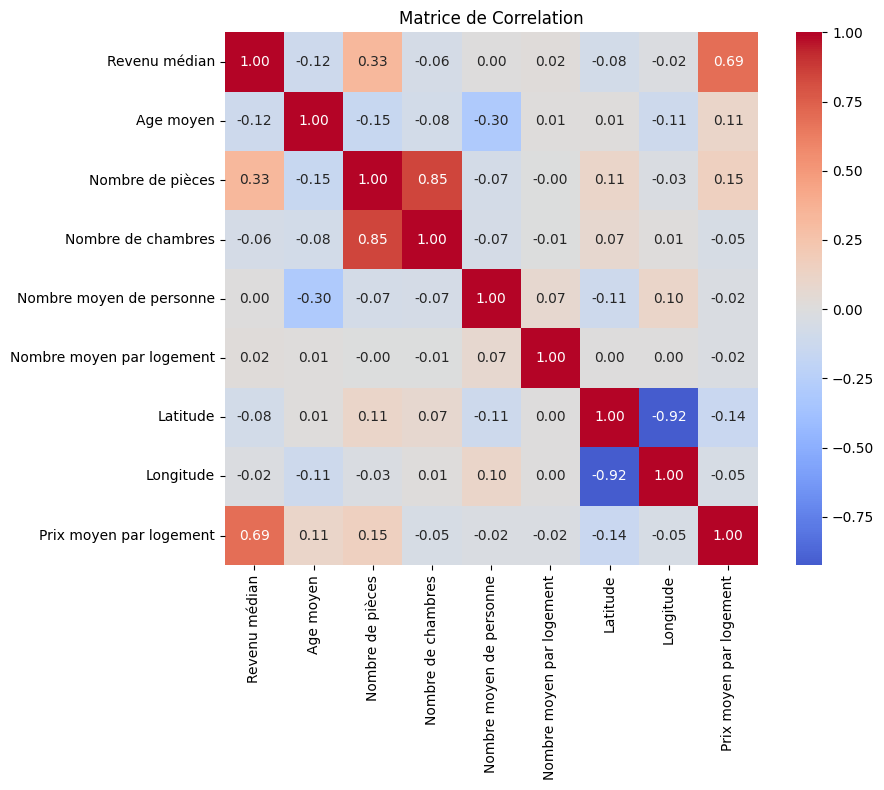

In [119]:
cor_matrix = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,)
plt.title('Matrice de Correlation')
plt.tight_layout()
plt.show()

# Spliting des données *train/validation/test* et normalisation via StandardScaler:

In [120]:
from sklearn.preprocessing import StandardScaler

X = dataset.drop(target, axis=1)
Y = dataset[target]

#Split des datas (60 train, 20 validation, 20 test)
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.4, random_state=3)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=3)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)


# Modlélisation de chaque modèle : Régression linéaire, Ridge et Lasso

Les modèles Ridge et Lasso sont tous deux des types de régularisation qui s’appliquent aux modèles de régression linéaire. La régularisation est une méthode statistique qui permet de réduire le risque d'erreur lié au surapprentissage et améliorer la précision des modèles statistiques.

*   Ridge se focalise sur la multicolinéarité des données. Il distribue la pénalisation entre les variables corrélées sans les supprimer, ce qui stabilise les coefficients.

*   Lasso (Least Absolute Shrinkage and Selection Operator)  est utilisé pour éliminer les caractéristiques (features) de données non pertinentes et prévient le surapprentissage





In [121]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluer_modele(modele, X_train, y_train, X_val, X_test, y_test, name):
    # Entraînement
    modele.fit(X_train, y_train)

    # Prédictions
    y_pred_train = modele.predict(X_train)
    y_pred_val = modele.predict(X_val)
    y_pred_test = modele.predict(X_test)

    # Métriques
    mse = mean_squared_error(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)

    # Résultats
    df_metrics = pd.DataFrame({
        "Métrique": ["Coefficient de détermination R²", "Mean Squared Error", "Mean Absolute Error"],
        "Valeur": [r2, mse, mae]
    })
    display(Markdown(name))
    display(df_metrics)
    return y_pred_test

# Entrainement
regressor = LinearRegression()
reg = "Modèle regression"
ridge = Ridge(alpha=1.0)
rid = "Modèle Ridge"
lasso = Lasso(alpha=0.1)
las = "Modèle Lasso"

# Modèle régression linéaire
y_pred_test_linéaire = evaluer_modele(regressor, X_train, y_train, X_validation, X_test, y_test, reg)
y_pred_test_ridge = evaluer_modele(ridge, X_train, y_train, X_validation, X_test, y_test,rid)
y_pred_test_lasso = evaluer_modele(lasso, X_train, y_train, X_validation, X_test, y_test,las)



Modèle regression

,Métrique,Valeur
0,Coefficient de détermination R²,0.592673
1,Mean Squared Error,0.532625
2,Mean Absolute Error,0.537122


Modèle Ridge

,Métrique,Valeur
0,Coefficient de détermination R²,0.592679
1,Mean Squared Error,0.532617
2,Mean Absolute Error,0.537116


Modèle Lasso

,Métrique,Valeur
0,Coefficient de détermination R²,0.483453
1,Mean Squared Error,0.675442
2,Mean Absolute Error,0.620864


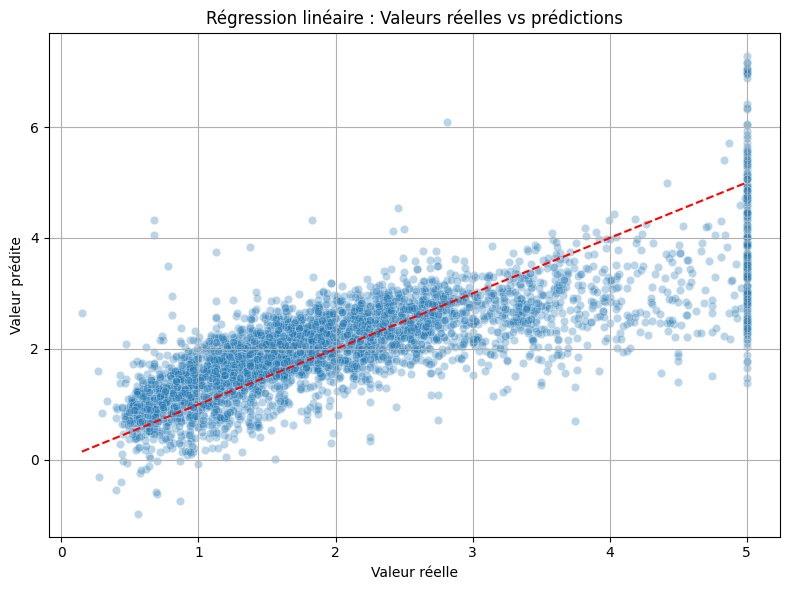

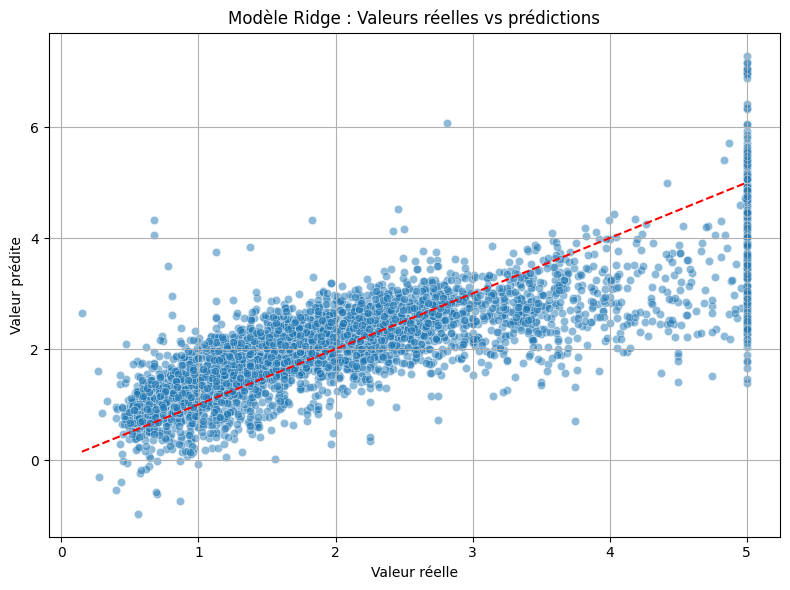

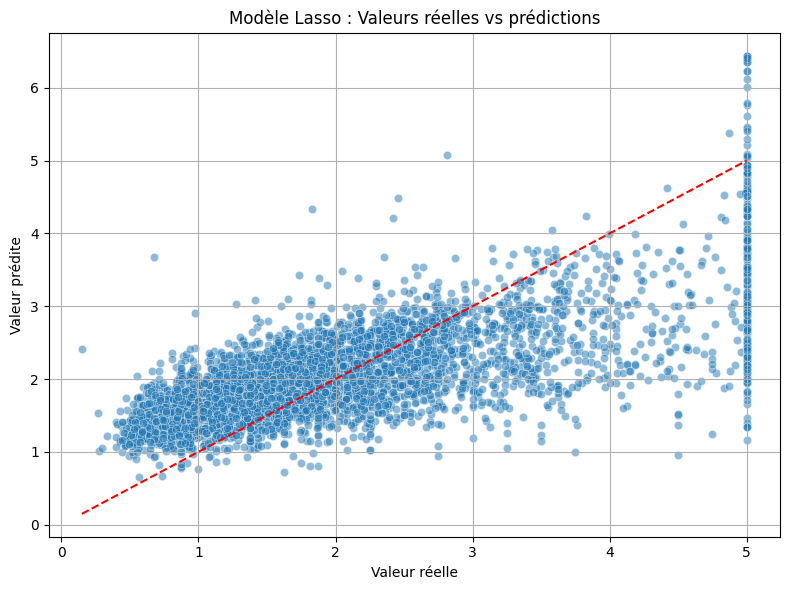

In [122]:
def plot_prediction_scatter(y_true, y_pred, titre, alpha=0.5):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=alpha)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--')
    plt.xlabel("Valeur réelle")
    plt.ylabel("Valeur prédite")
    plt.title(titre)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_prediction_scatter(y_test, y_pred_test_linéaire, "Régression linéaire : Valeurs réelles vs prédictions", alpha=0.3)
plot_prediction_scatter(y_test, y_pred_test_ridge, "Modèle Ridge : Valeurs réelles vs prédictions")
plot_prediction_scatter(y_test, y_pred_test_lasso, "Modèle Lasso : Valeurs réelles vs prédictions")


# Interpétation du résultat :


✅ **Régression Linéaire vs Ridge**

En analysant les métriques, on peut constater que les performances sont quasiment identiques (R², MSE, MAE sont égaux à 4e-5 près).

Cela signifie que Ridge n'apporte ici aucun gain notable, probablement parce que le dataset n'a pas de une grande mutlicolinéarité

❌ **Lasso**

R² nettement plus bas (0.48 vs 0.59) → il explique moins de variance
Cela indique que Lasso sous-performe clairement ici
car Lasso supprime trop de coefficients à cause de la pénalisation L1 (probablement car aucune feature inutile ou bruitée à éliminer)
